In [5]:
import numpy as np

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def Relu(x):
    return max(0,x)

In [8]:
def sigmoid_derivitive(x):
    return x*(1-x)

In [9]:
# yhat = sigmoid (w2*sigmoid (w1*x+b1)+b2)
class NeuralNetwork:
    def __init__(self,x,y) :
        self.input = x
        layer2_size=4
        self.weights1 = np.random.rand(self.input.shape[1],layer2_size)
        self.weights2   = np.random.rand(layer2_size,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input,self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1,self.weights2))
    
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output)* sigmoid_derivitive(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivitive(self.output), self.weights2.T) * sigmoid_derivitive(self.layer1)))
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

if __name__ == "__main__":
    
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    for i in range(15000):
        nn.feedforward()
        nn.backprop()

    print(nn.output)        

[[0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 18s 2us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


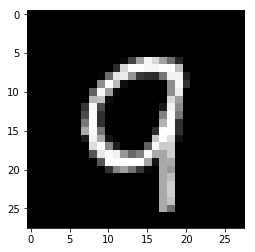

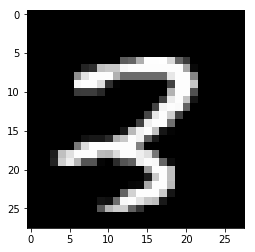

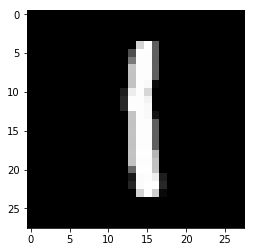

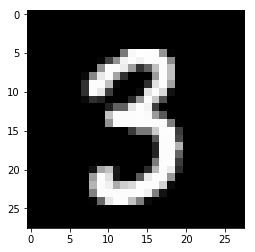

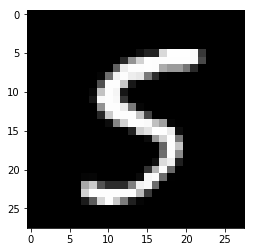

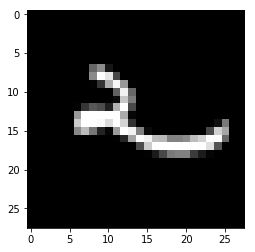

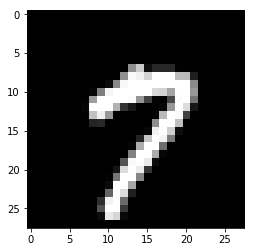

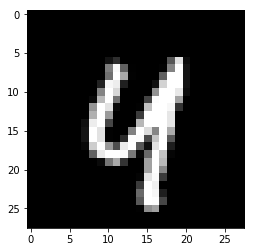

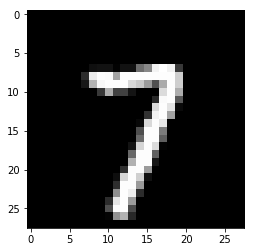

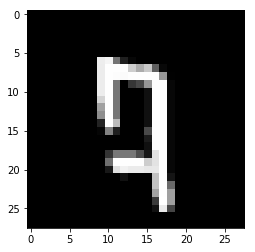

In [10]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) =mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 10 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=10)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 10 mnist digits
for i in range(len(indexes)):
    filename = "mnist%d.png" % labels[i]
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.savefig(filename)
    plt.show()

plt.close('all')

In [11]:
indexes

array([14436, 29061, 31887, 56820, 21244, 20967, 51885, 44894,  6176,
       31284])

In [12]:
# numpy package
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = np.amax(y_train) + 1

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# for mlp, the input dim is a vector, so we reshape
x_train = np.reshape(x_train, [-1, input_size])
# we train our network using float data
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

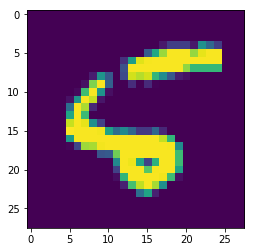

actual label 5
predicted label 5


In [13]:
#test and visualize the model
plt.imshow(x_test[8].reshape([28,28]))
plt.show()
print('actual label',np.argmax(y_test[8]))
print('predicted label',np.argmax(model.predict(x_test[8].reshape([-1,784]))))

In [83]:
yhat = model.predict(x_test)

yhat2 = np.argmax(yhat,axis=1)

y_test2= np.argmax(y_test,axis=1)

mismatch_indx = np.where(yhat2!=y_test2)